In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from datetime import datetime, timedelta
import sweetviz as sv
import IPython
%matplotlib inline

In [2]:
# read data from csv file.
df = pd.read_csv('../data/archive/weather-sa-2017-2019-clean.csv')
# df = pd.DataFrame(data)
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


In [4]:
df.shape

(249023, 15)

In [5]:
df.isnull().sum()

Unnamed: 0     0
city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [6]:
df.drop(['Unnamed: 0', 'time', 'minute'], axis =1 , inplace =True)
df.head(10)

,city,date,year,month,day,hour,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,2017,1,1,24,Clear,17,11,64%,1018.0,16
1,Qassim,1 January 2017,2017,1,1,1,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,2017,1,1,3,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,2017,1,1,4,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,2017,1,1,5,Clear,15,9,72%,1019.0,16
5,Qassim,1 January 2017,2017,1,1,6,Clear,13,13,82%,1019.0,16
6,Qassim,1 January 2017,2017,1,1,7,Sunny,12,7,88%,1019.0,16
7,Qassim,1 January 2017,2017,1,1,8,Sunny,14,9,72%,1021.0,16
8,Qassim,1 January 2017,2017,1,1,9,Sunny,15,9,72%,1021.0,7
9,Qassim,1 January 2017,2017,1,1,10,Sunny,17,7,64%,1021.0,9


In [7]:
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=True)

                                             |                                             | [  0%]   00:00 ->…

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
# IPython.display.HTML('analyze.html')

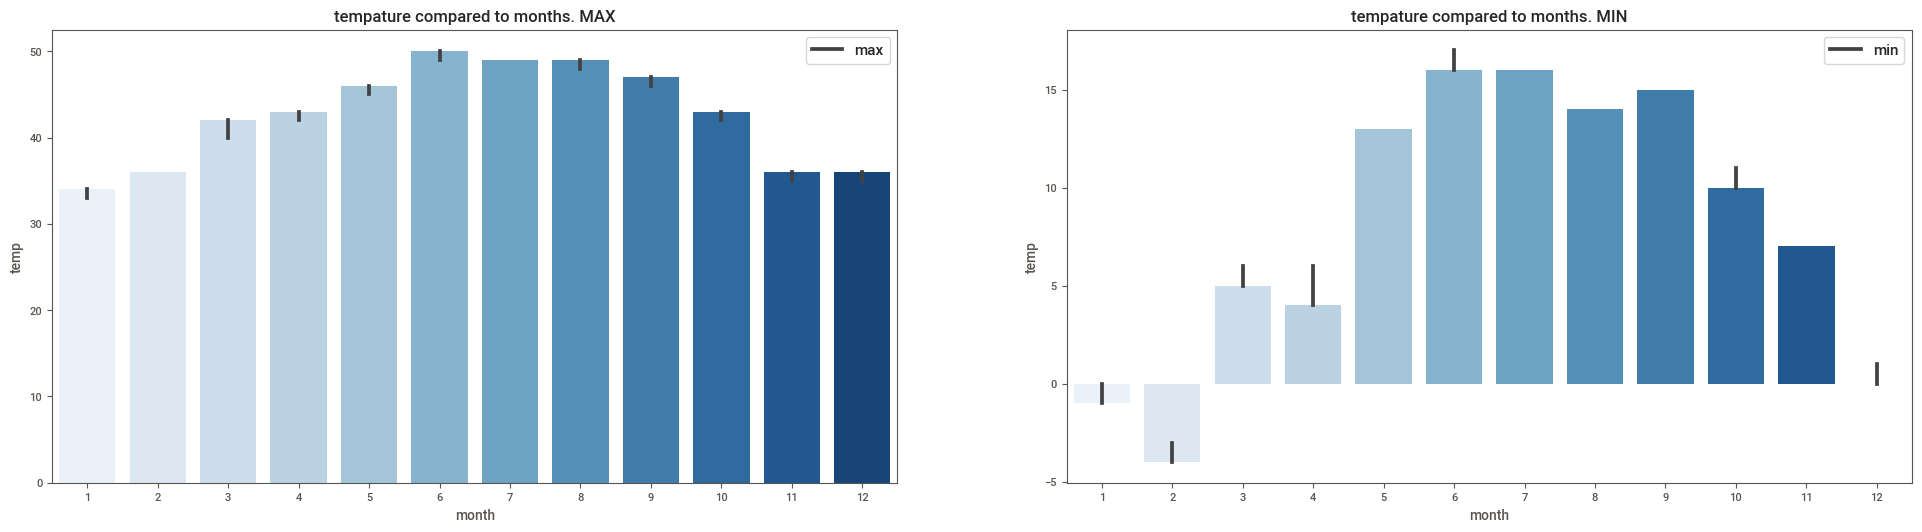

In [9]:
plt.figure(figsize=[24,6])

# first - MAX
plt.subplot(1,2,1)
sns.barplot(data=df, x='month', y='temp', estimator=np.max, palette='Blues')
plt.title('tempature compared to months. MAX')
plt.legend(['max'])

# second - MIN
plt.subplot(1,2,2)
sns.barplot(data=df, x='month', y='temp', estimator=np.min, palette='Blues')
plt.title('tempature compared to months. MIN')
plt.legend(['min'])

plt.show()

In [10]:
temp = df['temp']
# max_temp = temp.max()
# min_temp = temp.min()
print('max temp: ', temp.max())
print('min temp: ', temp.min())

max temp:  50
min temp:  -4


<AxesSubplot:xlabel='humidity', ylabel='temp'>

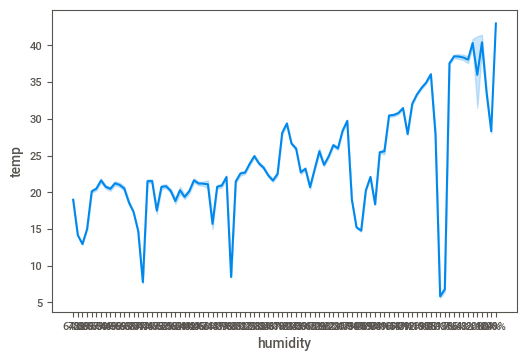

In [11]:
sns.lineplot(data=df, y="temp", x='humidity')